Jasper Sandhu Python Notebook
SID# 862188200
11/30/21

In [8]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "./Raw_Data"]).decode("utf8"))

Austin_Animal_Center_Intakes.csv
Austin_Animal_Center_Outcomes.csv
Reduced_AACO.csv



In [9]:
# Location of test file
# /home/js010582/Documents/Python_Code/project_1/Raw_Data
import pandas as pd
import numpy as np
from plotnine import *
from plotnine import ggplot, aes
from matplotlib import pyplot as plt

df = pd.read_csv("./Raw_Data/Austin_Animal_Center_Outcomes.csv") #Read entire 126k+ dataset
df.columns = df.columns.str.replace(' ', '_') #Replace column name spaces with lowerscore

df.columns = [x.lower() for x in df.columns] #Reduce column names to all lower case.

df = df.loc[(df['animal_type'] == 'Cat') | (df['animal_type'] == 'Dog')] #Dropping data containing "Other", "Bird", "Livestock"

df = df.dropna(subset=['age_upon_outcome']) #Drop rows with no age upon outcomes

df.reset_index(inplace=True) #Resets the index id's

In [10]:
#Adding dependent feature called "Adopted" with either 1: Yes or 0: No
df['adopted'] = df['outcome_type'].map({'Adoption': 1, })

df['adopted'] = df.adopted.fillna(0) #Fill columns that have NaN with 0

df['adopted'] = df.adopted.astype('int') #Sets adopted column as int64

In [11]:
# print(dfTime[dfTime[0].isnull()])
# print(df.iloc[[116813]])
# dfTime.loc[dfTime.isna()] #Detect missing values in a series
# rows with  df.isna().any(axis=1) ==#Checks for Nulls

# dfTime =  dfTime.dropna(subset=[0])
dftemp = df.isna()
dftemp

,index,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,adopted
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117215,False,False,False,False,False,False,False,True,False,False,False,False,False,False
117216,False,False,False,False,False,False,False,True,False,False,False,False,False,False
117217,False,False,False,False,False,False,False,False,False,False,False,False,False,False
117218,False,False,True,False,False,False,False,True,False,False,False,False,False,False


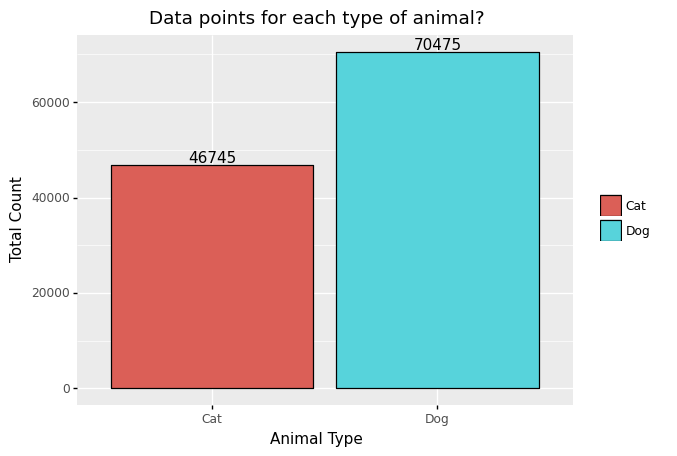

<ggplot: (8728240207984)>

In [12]:
#Breakdown of the Data
(ggplot(data = df, mapping=aes(x='animal_type', fill='animal_type'))
    + geom_bar(
        colour='black'
    )
    + geom_text(
        aes(label=after_stat('count')),
        stat='count',
        nudge_y=0.125,
        va='bottom'
    )
    + theme(legend_title = element_blank())
    + labs(x='Animal Type', y='Total Count', title='Data points for each type of animal?')
)

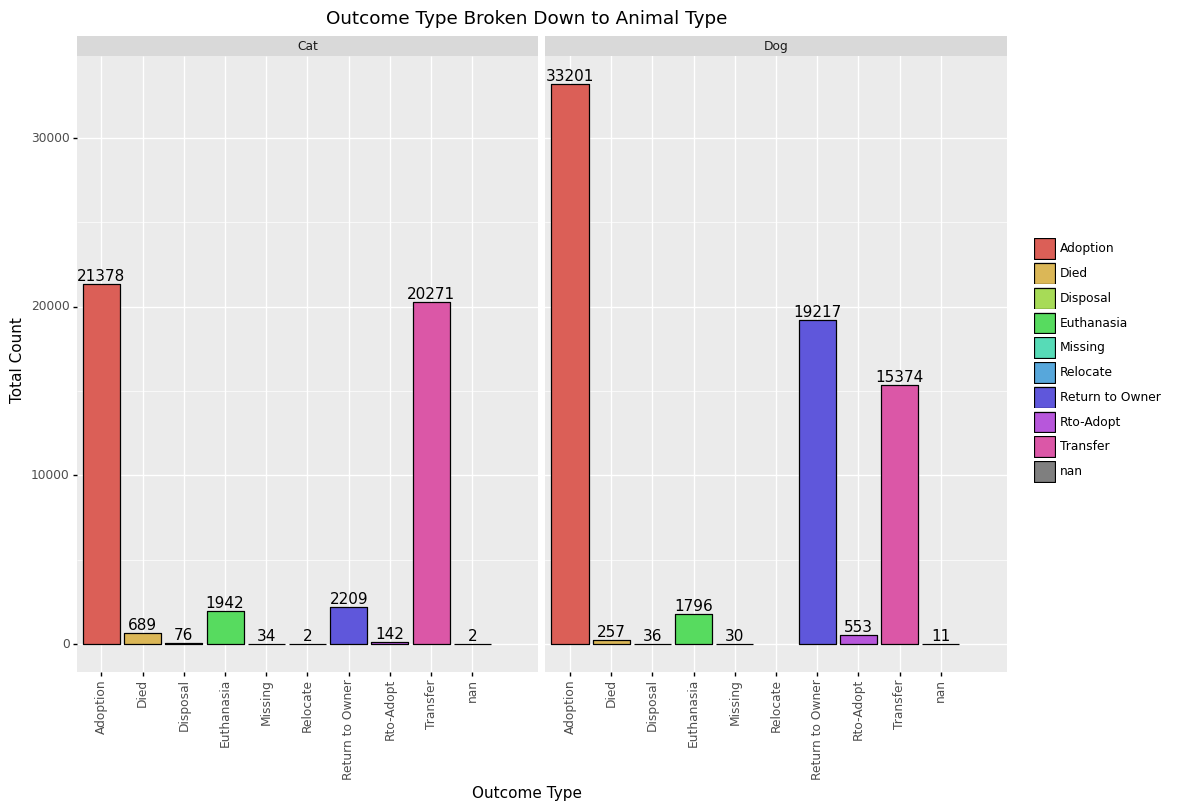

<ggplot: (8728240208113)>

In [15]:
#Breakdown of the Data
import plotnine as p9
(ggplot(data = df, mapping=aes(x='outcome_type', fill='outcome_type'))
    + geom_bar(
        colour='black'
    )
    + geom_text(
        aes(label=after_stat('count')),
        stat='count',
        nudge_y=0.125,
        va='bottom'
    )
    + facet_grid('~animal_type')
    + theme(figure_size=(12, 8), axis_text_x=p9.element_text(rotation=90),legend_title = element_blank())
    + labs(x='Outcome Type', y='Total Count', title='Outcome Type Broken Down to Animal Type')
)

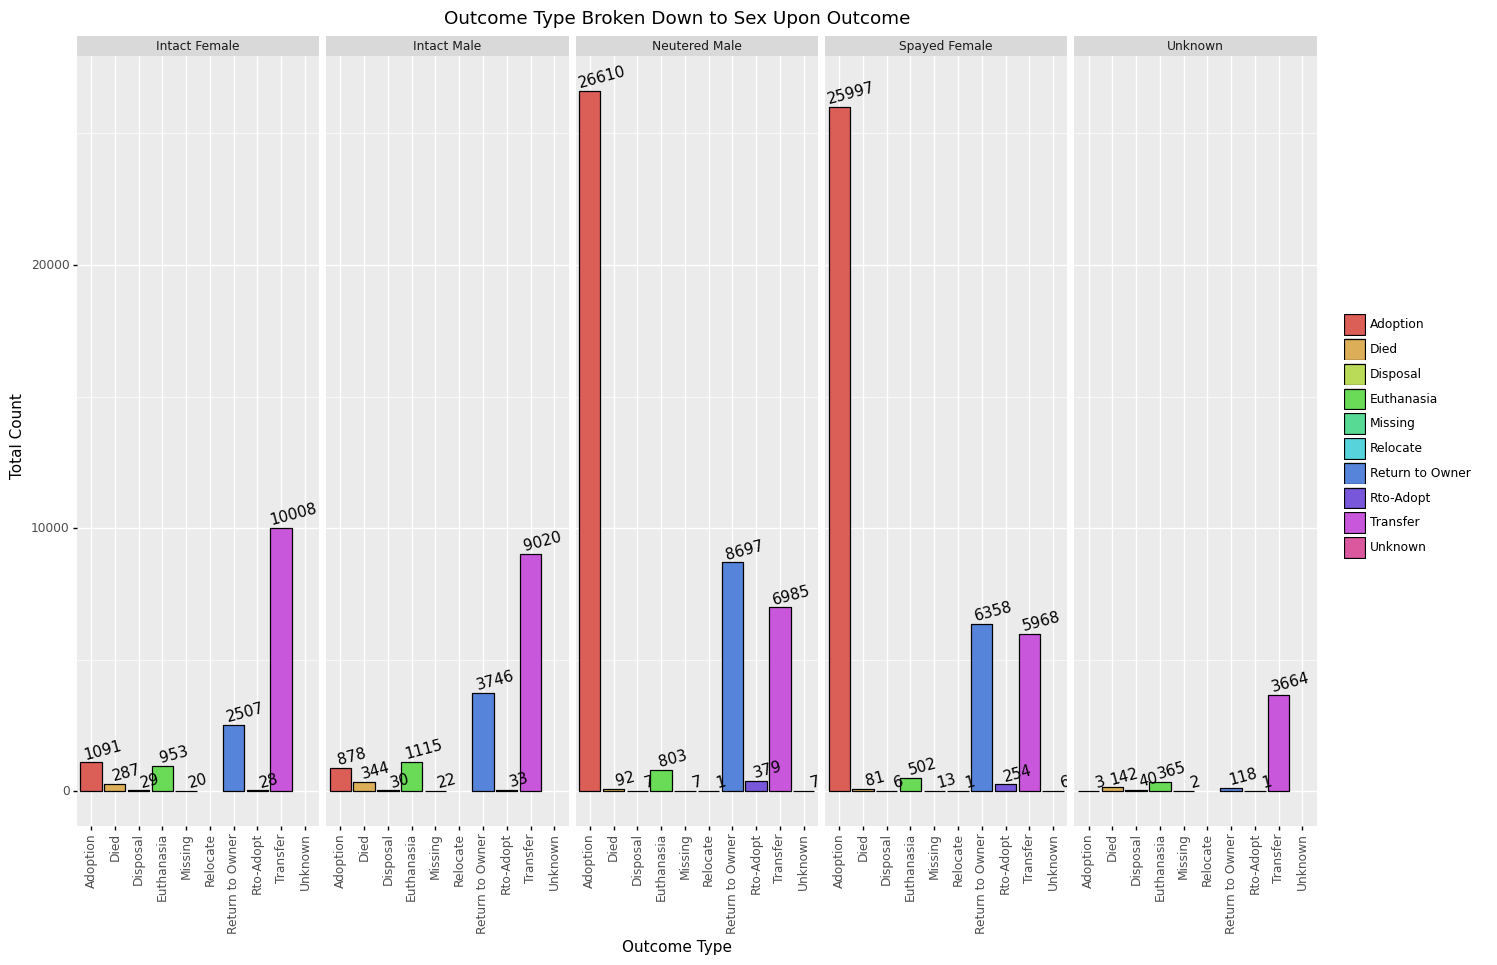

<ggplot: (8728535866040)>

In [16]:
#Ran into issues with NaN and Unknown variables in sex_upon_outcome

df['sex_upon_outcome']=df['sex_upon_outcome'].fillna("Unknown")
df['outcome_type']=df['outcome_type'].fillna("Unknown")


(ggplot(data = df, mapping=aes(x='outcome_type', fill='outcome_type'))
    + geom_bar(
        colour='black'
    )
    + geom_text(
        aes(label=after_stat('count')),
        stat='count',
        angle=15,
        nudge_y=0.125,
        nudge_x=0.500,
        va='bottom'
    )

    + facet_grid('~sex_upon_outcome')
  
    + theme(figure_size=(16, 10), axis_text_x=p9.element_text(rotation=90), legend_title = element_blank())
    + labs(x='Outcome Type', y='Total Count', title='Outcome Type Broken Down to Sex Upon Outcome')
)

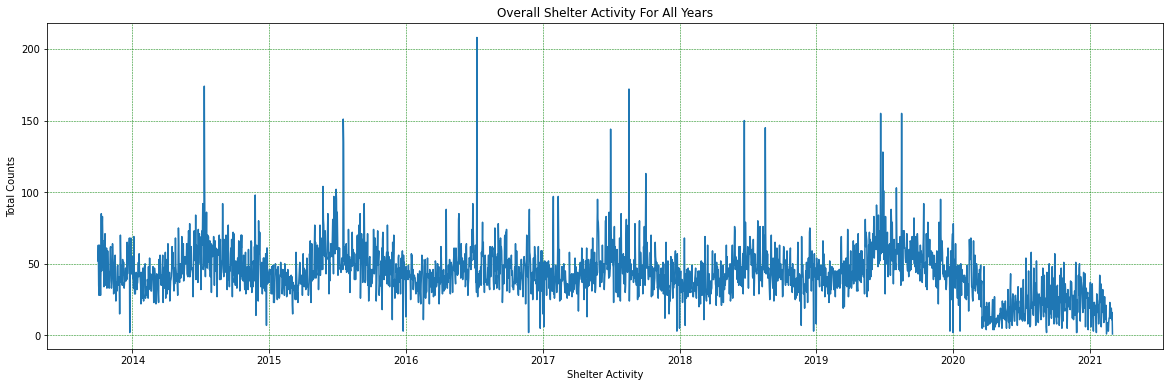

In [17]:
df["datetime"] = pd.to_datetime(df['datetime']).dt.date

plt.figure(figsize=(20,6))
df["outcome_type"].groupby(df["datetime"]).count().plot(kind="line")
plt.title('Overall Shelter Activity For All Years')
plt.xlabel("Shelter Activity")
plt.ylabel("Total Counts")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

In [ ]:
df.head()

,index,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,adopted
0,0,A794011,Chunk,2019-05-08,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,0
1,1,A776359,Gizmo,2018-07-18,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1
2,3,A720371,Moose,2016-02-13,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,1
3,4,A674754,NaN,2014-03-18,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,0
4,5,A659412,Princess,2020-10-05,10/05/2020 02:37:00 PM,03/24/2013,Adoption,NaN,Dog,Spayed Female,7 years,Chihuahua Shorthair Mix,Brown,1


In [18]:
#Removed Disposal, Missing, Relocate, and Unknown Values
filtered_df = df[(df.outcome_type != 'Disposal') & (df.outcome_type != 'Missing') & (df.outcome_type != 'Relocate') & (df.outcome_type != 'Unknown')]
monthGroup=filtered_df["datetime"].groupby(df["outcome_type"])

In [19]:
monthGroup.describe()

,count,unique,top,freq
outcome_type,,,,
Adoption,54579,2665,2016-07-09,197
Died,946,721,2019-03-06,5
Euthanasia,3738,1677,2014-07-23,17
Return to Owner,21426,2657,2016-12-29,28
Rto-Adopt,695,511,2020-03-02,6
Transfer,35645,2660,2019-06-28,91


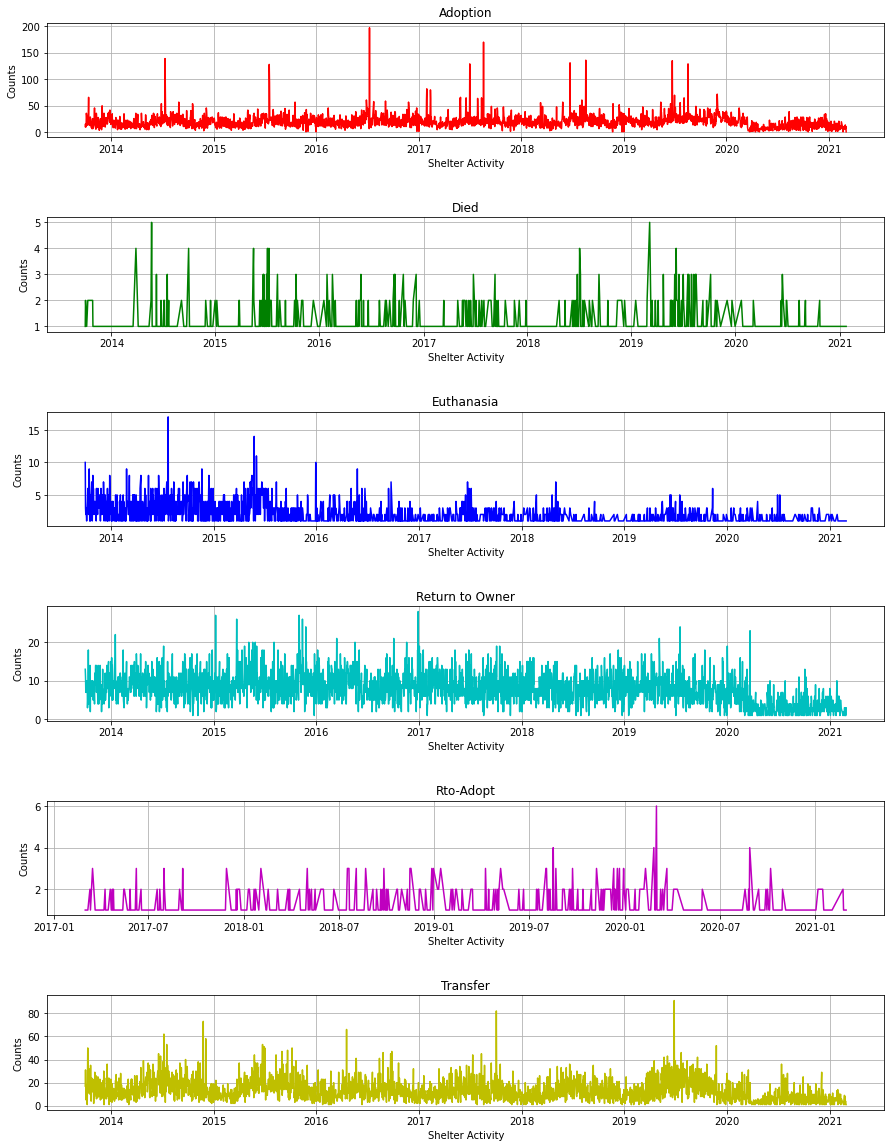

In [20]:
#For each outcome
plt.subplots(8, 1, figsize=(15, 20), sharex=True)
plt.subplots_adjust( hspace=0.7)


colors = list('rgbcmykrgb')

for i, (_, g) in enumerate(monthGroup):
    plt.subplot(6,1,i+1)
    plt.title(_)
    g.groupby(df["datetime"]).count().plot(kind="line", color=colors[i])
    plt.xlabel("Shelter Activity")
    plt.ylabel("Counts")
    plt.grid()


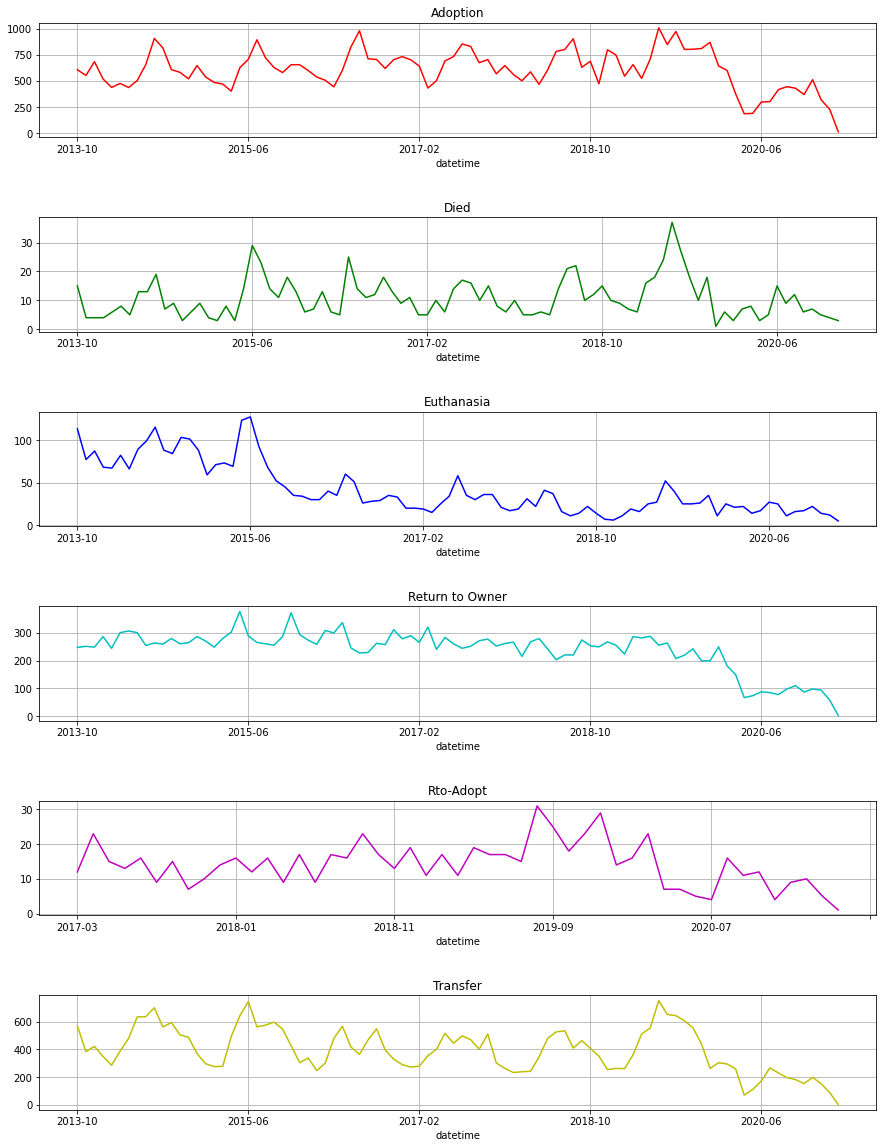

In [21]:

#Monthly time series
df_ym=filtered_df.datetime.map(lambda x: x.strftime('%Y-%m'))
df_ym_outcomeGroup = df_ym.groupby(filtered_df["outcome_type"])

plt.subplots(8, 1, figsize=(15, 20), sharex=True)
plt.subplots_adjust( hspace=0.7)
colors = list('rgbcmyk')
for i, (_, g) in enumerate(df_ym_outcomeGroup):
    plt.subplot(6,1,i+1)
    plt.title(_)
    g.groupby(df_ym).count().plot(kind="line", color=colors[i])
    plt.grid()

In [22]:
#Convert 'Age upon Outcome' to using days only.
# del dfTime
d = {'year':365, 'month': 31, 'week':7, 'day':1, 'hour':24}
dfTime = df['age_upon_outcome'].str.extract('(\d+)\s+(year|year|month|hour|day|week)', expand=True)
dfTime.columns = ['count','unit']
dfTime.astype({'count':'int64'}).dtypes
dfTime['Time'] = dfTime['count'].astype(int).mul(dfTime['unit'].map(d)).astype('int64')
df['age'] = dfTime['Time']

1) Get a quick visualization of the data before any cleanup or processing.
    Group Bar Chart

Cleaning up the data and removing columns
    1) Added No Names to empty names.
    2) 
Drop Columns "MonthYear, DateofBirth"
Convert Age Upon Outcome to Days Months



In [23]:
from sklearn.preprocessing import LabelEncoder #Library to perform the LabelEncoder operation on the data frame.

labelencode = LabelEncoder() #Create object from LabelEncoder class

#I'm going to go through the data frame and any columns that are of dtype 'object' I'll label encode.
for cols in df.columns:
    if df[cols].dtype == 'object':
        df[cols] = labelencode.fit_transform(df[cols])

df.head()

,index,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,adopted,age
0,0,84498,10315,2045,30087,2355,7,23,0,2,24,1108,166,0,730
1,1,73706,12039,1751,50229,3747,0,23,1,2,8,789,516,1,365
2,3,39939,15082,865,11094,5451,0,23,1,2,34,122,198,1,124
3,4,10736,19496,168,18839,1353,8,15,0,1,41,1108,348,0,6
4,5,3874,16409,2556,71923,1590,0,23,1,3,45,789,124,1,2555


In [24]:
y_value = df.adopted #saving the income column to y_value
df.drop("adopted", axis=1, inplace = True) #dropping the income column(axis = 1) from the DataFrame
df.drop("outcome_type", axis=1, inplace = True)
df.drop("age_upon_outcome", axis=1, inplace = True)
df.drop("index", axis=1, inplace = True)
df.drop("animal_id", axis=1, inplace = True)
df.drop("monthyear", axis=1, inplace = True)

In [25]:
df.head()

,name,datetime,date_of_birth,outcome_subtype,animal_type,sex_upon_outcome,breed,color,age
0,10315,2045,2355,23,0,2,1108,166,730
1,12039,1751,3747,23,1,2,789,516,365
2,15082,865,5451,23,1,2,122,198,124
3,19496,168,1353,15,0,1,1108,348,6
4,16409,2556,1590,23,1,3,789,124,2555


In [38]:
from sklearn.model_selection import train_test_split

X_label = df #Loading the data frame into X_label

# # Splitting up the data into 80:20 Train:Test
# X_train, X_test, y_train, y_test = train_test_split(X_label, y_value, test_size = 0.2, random_state = 20)

seed = 50

#Reducing the dataset into a smaller sample size (10% of Population). Going with 70% Training, 20% Validation, 10%
print("\nTraining / Validation / Testing Data Summary:")

#Splitting 85/15 Training/Validation (Training is now 70%)
(X_train, X_val, y_train, y_val) = train_test_split(X_label, y_value, test_size=0.2, random_state = seed)

#Splitting Splitting into 90/10 Training/Test
(X_train, X_test, y_train, y_test) = train_test_split( X_train, y_train, test_size =0.125, random_state = seed)

print("Training Data - X_train values: {}".format(len(X_train)))
print("Training Data - y_train values: {}".format(len(y_train)))
print("Validation Data - X_val values: {}".format(len(X_val)))
print("Validation Data - y_val values: {}".format(len(y_val)))
print("Testing Data - X_test values: {}".format(len(X_test)))
print("Testing Data - y_test values: {}".format(len(y_test)))
print("Total Values Data Points: {0} X's, and {1} y's".format(len(X_train)+len(X_val)+len(X_test), len(y_train)+len(y_val)+len(y_test)))


New Array Size trimmed:
Training Data - X_train values: 82054
Training Data - y_train values: 82054
Validation Data - X_val values: 23444
Validation Data - y_val values: 23444
Testing Data - X_test values: 11722
Tasting Data - y_test values: 11722
Total Values Data Points: 117220 X's, and 117220 y's


In [27]:
from sklearn.ensemble import RandomForestClassifier as RFC

# n_estimater = [10, 50, 100, 200, 400, 800] # number of trees
# max_depth = [3, 5, 10, 20, 40]
# for x in max_depth:
#     for y in n_estimater:
#         rf_classifier = RFC(n_estimators = y, max_depth = x) #Creating a Random Forest Classifier from sklearn
#         rf_classifier.fit(X_train, y_train) #Training the model with our training set
#         scores = rf_classifier.score(X_val, y_val) #Using our validation set to check for accuracy score
#         print("Validation Score of: {0:2.2f}%".format(scores*100),y,"n_estimater",x,"Depth")

estimater = 200
depth = 40
rf_classifier = RFC(n_estimators = estimater, max_depth = depth) #Creating a Random Forest Classifier from sklearn
rf_classifier.fit(X_train, y_train) #Training the model with our training set
scores = rf_classifier.score(X_val, y_val) #Using our validation set to check for accuracy score
print("Validation Score of: {0:2.2f}%".format(scores*100),estimater,"n_estimater",depth,"Depth")
y_pred = rf_classifier.predict(X_test)


Validation Score of: 90.09% 200 n_estimater 40 Depth


Text(0.5, 1.0, 'RFC Confusion Matrix')

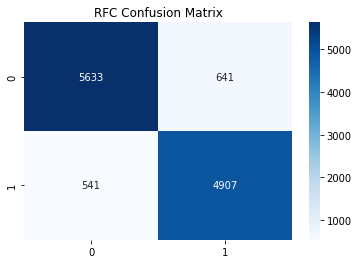

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred)

ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, ax = ax, cmap='Blues', fmt='g')
ax.set_title('RFC Confusion Matrix')

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      6274
           1       0.88      0.90      0.89      5448

    accuracy                           0.90     11722
   macro avg       0.90      0.90      0.90     11722
weighted avg       0.90      0.90      0.90     11722



In [32]:
from sklearn.linear_model import LogisticRegression

lf_classifier = LogisticRegression(max_iter=1000)
lf_classifier.fit(X_train, y_train) #Training the model with our training set
scores = lf_classifier.score(X_val, y_val) #Using our validation set to check for accuracy score
print("Validation Score of: {0:2.2f}%".format(scores*100),estimater,"n_estimater",depth,"Depth")
y_pred = lf_classifier.predict(X_test)

Validation Score of: 68.37% 200 n_estimater 40 Depth


Text(0.5, 1.0, 'LR Confusion Matrix')

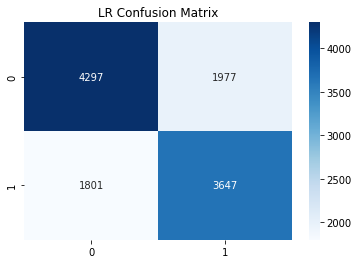

In [33]:
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred)

ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_title('LR Confusion Matrix')

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      6274
           1       0.65      0.67      0.66      5448

    accuracy                           0.68     11722
   macro avg       0.68      0.68      0.68     11722
weighted avg       0.68      0.68      0.68     11722



In [36]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

start_time = time.time()
importances = rf_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.057 seconds


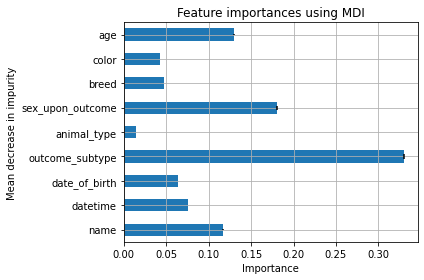

In [37]:
feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.barh(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xlabel("Importance")
fig.tight_layout()
plt.grid()
plt.show()